In [1]:
from sklearn.datasets import load_iris
import pandas as pd
iris_flower = load_iris()

features = pd.DataFrame(iris_flower.data, columns=iris_flower.feature_names)

target = pd.DataFrame(iris_flower.target, columns=['species'])

print(features.head(10))

print(target.head(10))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
5                5.4               3.9                1.7               0.4
6                4.6               3.4                1.4               0.3
7                5.0               3.4                1.5               0.2
8                4.4               2.9                1.4               0.2
9                4.9               3.1                1.5               0.1
   species
0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0


In [2]:
features.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [3]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
# Introducing missing values

features.loc[10, 'sepal length (cm)'] = None
features.loc[50:54, 'sepal width (cm)'] = None
features.loc[100:102, 'petal length (cm)'] = None
features.loc[73:78, 'petal width (cm)'] = None


In [8]:
features.isnull().sum()

sepal length (cm)    1
sepal width (cm)     5
petal length (cm)    3
petal width (cm)     6
dtype: int64

In [9]:
from sklearn.impute import SimpleImputer

impute_mean = SimpleImputer(strategy='mean')

impute_median = SimpleImputer(strategy='median')

In [10]:
features[['sepal length (cm)']] = impute_mean.fit_transform(features[["sepal length (cm)"]])
features[['sepal width (cm)']] = impute_median.fit_transform(features[["sepal width (cm)"]])
features[['petal length (cm)']] = impute_mean.fit_transform(features[["petal length (cm)"]])
features[['petal width (cm)']] = impute_median.fit_transform(features[["petal width (cm)"]])

In [11]:
features.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [16]:
# ZSCORE

from scipy import stats

z_scores = stats.zscore(features)

print(z_scores)

[[-0.9051633   1.0250128  -1.3349237  -1.31214041]
 [-1.14773404 -0.13977447 -1.3349237  -1.31214041]
 [-1.39030478  0.32614043 -1.39248715 -1.31214041]
 [-1.51159016  0.09318298 -1.27736026 -1.31214041]
 [-1.02644867  1.25797025 -1.3349237  -1.31214041]
 [-0.54130719  1.95684261 -1.16223337 -1.0483052 ]
 [-1.51159016  0.79205534 -1.3349237  -1.1802228 ]
 [-1.02644867  0.79205534 -1.27736026 -1.31214041]
 [-1.7541609  -0.37273193 -1.3349237  -1.31214041]
 [-1.14773404  0.09318298 -1.27736026 -1.44405801]
 [ 0.          1.4909277  -1.27736026 -1.31214041]
 [-1.26901941  0.79205534 -1.21979681 -1.31214041]
 [-1.26901941 -0.13977447 -1.3349237  -1.44405801]
 [-1.87544627 -0.13977447 -1.50761404 -1.44405801]
 [-0.05616571  2.18980006 -1.45005059 -1.31214041]
 [-0.17745108  3.12162988 -1.27736026 -1.0483052 ]
 [-0.54130719  1.95684261 -1.39248715 -1.0483052 ]
 [-0.9051633   1.0250128  -1.3349237  -1.1802228 ]
 [-0.17745108  1.72388516 -1.16223337 -1.1802228 ]
 [-0.9051633   1.72388516 -1.27

In [18]:
# Removal Method

handle_outliers_1 = features.copy()
features_with_removed_outliers = handle_outliers_1[(abs(z_scores) < 3).all(axis=1)]

In [19]:
features_with_removed_outliers.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Capping Method

import numpy as np

handle_outliers_2 = features.copy()

threshold = 3

for i, col in enumerate(handle_outliers_2.select_dtypes(include=[np.number]).columns):

    outliers = handle_outliers_2[col][(abs(stats.zscore(handle_outliers_2[col]))) > threshold]
    
    handle_outliers_2[col] = np.where(
    np.abs(z_score                         s[:, i]) > threshold,  # <-- replaced .iloc with [:, i]
    handle_outliers_2[col].clip(lower=outliers.min(), upper=outliers.max()),
    handle_outliers_2[col]
)


In [28]:
handle_outliers_2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [29]:
# FEATURE SCALING

# Standardization

from sklearn.preprocessing import StandardScaler

standardize_features = features.copy()

scaler = StandardScaler()

standard_features = scaler.fit_transform(standardize_features)

print(standard_features)

[[-0.9051633   1.0250128  -1.3349237  -1.31214041]
 [-1.14773404 -0.13977447 -1.3349237  -1.31214041]
 [-1.39030478  0.32614043 -1.39248715 -1.31214041]
 [-1.51159016  0.09318298 -1.27736026 -1.31214041]
 [-1.02644867  1.25797025 -1.3349237  -1.31214041]
 [-0.54130719  1.95684261 -1.16223337 -1.0483052 ]
 [-1.51159016  0.79205534 -1.3349237  -1.1802228 ]
 [-1.02644867  0.79205534 -1.27736026 -1.31214041]
 [-1.7541609  -0.37273193 -1.3349237  -1.31214041]
 [-1.14773404  0.09318298 -1.27736026 -1.44405801]
 [ 0.          1.4909277  -1.27736026 -1.31214041]
 [-1.26901941  0.79205534 -1.21979681 -1.31214041]
 [-1.26901941 -0.13977447 -1.3349237  -1.44405801]
 [-1.87544627 -0.13977447 -1.50761404 -1.44405801]
 [-0.05616571  2.18980006 -1.45005059 -1.31214041]
 [-0.17745108  3.12162988 -1.27736026 -1.0483052 ]
 [-0.54130719  1.95684261 -1.39248715 -1.0483052 ]
 [-0.9051633   1.0250128  -1.3349237  -1.1802228 ]
 [-0.17745108  1.72388516 -1.16223337 -1.1802228 ]
 [-0.9051633   1.72388516 -1.27

In [30]:
# Normalization

from sklearn.preprocessing import MinMaxScaler

normalize_features = features.copy()

normalizer = MinMaxScaler()

normal_features = normalizer.fit_transform(normalize_features)

print(normal_features)

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.4295302  0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0.58333333 0.11864407 0.04166667]
 [0.22222222 

In [33]:
#import the train_test_split() function --> The name is quite intuitive
from sklearn.model_selection import train_test_split

# Lets make a copy of our dataset
feature_data = features.copy()
target_data = target.copy()

# Lets split the data --> Take time to understand the arrangement of the variable names and their font cases
X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, test_size=0.3, random_state=234)

# LEts print the shape of the features
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Lets print for the target - which should be a single column
print(f"\nTraining set size: {y_train.shape}")
print(f"Test set size: {y_test.shape}")

Training set size: (105, 4)
Test set size: (45, 4)

Training set size: (105, 1)
Test set size: (45, 1)


In [34]:
# Feature Selection

from sklearn.feature_selection import SelectKBest, f_classif

selection_features = features.copy()
selection_target = target.copy()

best_features = SelectKBest(score_func=f_classif, k=3)
selected_best_features = best_features.fit_transform(selection_features, selection_target)

selected_best_features.shape

c:\Users\user49\Documents\module_3\model\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(150, 3)

In [35]:
print(selected_best_features)

[[5.1        1.4        0.2       ]
 [4.9        1.4        0.2       ]
 [4.7        1.3        0.2       ]
 [4.6        1.5        0.2       ]
 [5.         1.4        0.2       ]
 [5.4        1.7        0.4       ]
 [4.6        1.4        0.3       ]
 [5.         1.5        0.2       ]
 [4.4        1.4        0.2       ]
 [4.9        1.5        0.1       ]
 [5.84630872 1.5        0.2       ]
 [4.8        1.6        0.2       ]
 [4.8        1.4        0.1       ]
 [4.3        1.1        0.1       ]
 [5.8        1.2        0.2       ]
 [5.7        1.5        0.4       ]
 [5.4        1.3        0.4       ]
 [5.1        1.4        0.3       ]
 [5.7        1.7        0.3       ]
 [5.1        1.5        0.3       ]
 [5.4        1.7        0.2       ]
 [5.1        1.5        0.4       ]
 [4.6        1.         0.2       ]
 [5.1        1.7        0.5       ]
 [4.8        1.9        0.2       ]
 [5.         1.6        0.2       ]
 [5.         1.6        0.4       ]
 [5.2        1.5        0.2 

In [36]:
# Dimensionality Reduction

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

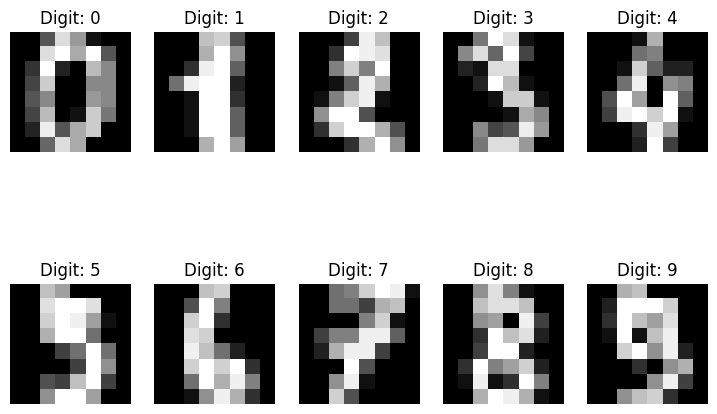

In [37]:
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(9, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Digit: {digits.target[i]}")
    ax.axis("off")
plt.show()

In [ ]:
X = digits.data
y = digits.target

In [40]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)


In [41]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [42]:
X.columns

RangeIndex(start=0, stop=64, step=1)

In [43]:
print(f"The rows is: {X.shape[0]}")
print(f"The columns is: {X.shape[1]}")

The rows is: 1797
The columns is: 64


In [ ]:
X_dimensions = X.copy()

